# **Homework 1: Linear Regression**

# **Load 'train.csv'**
train.csv 的資料為 12 個月中，每個月取 20 天，每天 24 小時的資料(每小時資料有 18 個 features)。

In [1]:
import sys
import pandas as pd
import numpy as np
data = pd.read_csv('./../data/train.csv', encoding = 'big5')

# **Preprocessing** 
取需要的數值部分，將 'RAINFALL' 欄位全部補 0。
另外，如果要在 colab 重覆這段程式碼的執行，請從頭開始執行(把上面的都重新跑一次)，以避免跑出不是自己要的結果（若自己寫程式不會遇到，但 colab 重複跑這段會一直往下取資料。意即第一次取原本資料的第三欄之後的資料，第二次取第一次取的資料掉三欄之後的資料，...）。

In [2]:
data = data.iloc[:, 3:]
data[data == 'NR'] = 0
raw_data = data.to_numpy()

# **Extract Features (1)**
![圖片說明](https://drive.google.com/uc?id=1LyaqD4ojX07oe5oDzPO99l9ts5NRyArH)
![圖片說明](https://drive.google.com/uc?id=1ZroBarcnlsr85gibeqEF-MtY13xJTG47)

將原始 4320 * 18 的資料依照每個月分重組成 12 個 18 (features) * 480 (hours) 的資料。 

In [3]:
month_data = {}
for month in range(12):
    sample = np.empty([18, 480])
    for day in range(20):
        sample[:, day * 24 : (day + 1) * 24] = raw_data[18 * (20 * month + day) : 18 * (20 * month + day + 1), :]
    month_data[month] = sample

# **Extract Features (2)**
![alt text](https://drive.google.com/uc?id=1wKoPuaRHoX682LMiBgIoOP4PDyNKsJLK)
![alt text](https://drive.google.com/uc?id=1FRWWiXQ-Qh0i9tyx0LiugHYF_xDdkhLN)

每個月會有 480hrs，每 9 小時形成一個 data，每個月會有 471 個 data，故總資料數為 471 * 12 筆，而每筆 data 有 9 * 18 的 features (一小時 18 個 features * 9 小時)。

對應的 target 則有 471 * 12 個(第 10 個小時的 PM2.5)

In [16]:
x = np.empty([12 * 471, 18 * 9], dtype = float)
y = np.empty([12 * 471, 1], dtype = float)
for month in range(12):
    for day in range(20):
        for hour in range(24):
            if day == 19 and hour > 14:
                continue
            x[month * 471 + day * 24 + hour, :] = month_data[month][:,day * 24 + hour : day * 24 + hour + 9].reshape(1, -1) #vector dim:18*9 (9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9)
            y[month * 471 + day * 24 + hour, 0] = month_data[month][9, day * 24 + hour + 9] #value
print(x)
print(y)

[[14.  14.  14.  ...  2.   2.   0.5]
 [14.  14.  13.  ...  2.   0.5  0.3]
 [14.  13.  12.  ...  0.5  0.3  0.8]
 ...
 [17.  18.  19.  ...  1.1  1.4  1.3]
 [18.  19.  18.  ...  1.4  1.3  1.6]
 [19.  18.  17.  ...  1.3  1.6  1.8]]
[[30.]
 [41.]
 [44.]
 ...
 [17.]
 [24.]
 [29.]]


# **Normalize (1)**


In [17]:
mean_x = np.mean(x, axis = 0) #18 * 9 
std_x = np.std(x, axis = 0) #18 * 9 
for i in range(len(x)): #12 * 471
    for j in range(len(x[0])): #18 * 9 
        if std_x[j] != 0:
            x[i][j] = (x[i][j] - mean_x[j]) / std_x[j]
x

array([[-1.35825331, -1.35883937, -1.359222  , ...,  0.26650729,
         0.2656797 , -1.14082131],
       [-1.35825331, -1.35883937, -1.51819928, ...,  0.26650729,
        -1.13963133, -1.32832904],
       [-1.35825331, -1.51789368, -1.67717656, ..., -1.13923451,
        -1.32700613, -0.85955971],
       ...,
       [-0.88092053, -0.72262212, -0.56433559, ..., -0.57693779,
        -0.29644471, -0.39079039],
       [-0.7218096 , -0.56356781, -0.72331287, ..., -0.29578943,
        -0.39013211, -0.1095288 ],
       [-0.56269867, -0.72262212, -0.88229015, ..., -0.38950555,
        -0.10906991,  0.07797893]])

#**Split Training Data Into "train_set" and "validation_set"**
這部分是針對作業中 report 的第二題、第三題做的簡單示範，以生成比較中用來訓練的 train_set 和不會被放入訓練、只是用來驗證的 validation_set。

In [6]:
import math
x_train_set = x[: math.floor(len(x) * 0.8), :]
y_train_set = y[: math.floor(len(y) * 0.8), :]
x_validation = x[math.floor(len(x) * 0.8): , :]
y_validation = y[math.floor(len(y) * 0.8): , :]
print(x_train_set)
print(y_train_set)
print(x_validation)
print(y_validation)
print(len(x_train_set))
print(len(y_train_set))
print(len(x_validation))
print(len(y_validation))

[[-1.35825331 -1.35883937 -1.359222   ...  0.26650729  0.2656797
  -1.14082131]
 [-1.35825331 -1.35883937 -1.51819928 ...  0.26650729 -1.13963133
  -1.32832904]
 [-1.35825331 -1.51789368 -1.67717656 ... -1.13923451 -1.32700613
  -0.85955971]
 ...
 [ 0.86929969  0.70886668  0.38952809 ...  1.39110073  0.2656797
  -0.39079039]
 [ 0.71018876  0.39075806  0.07157353 ...  0.26650729 -0.39013211
  -0.39079039]
 [ 0.3919669   0.07264944  0.07157353 ... -0.38950555 -0.39013211
  -0.85955971]]
[[30.]
 [41.]
 [44.]
 ...
 [ 7.]
 [ 5.]
 [14.]]
[[ 0.07374504  0.07264944  0.07157353 ... -0.38950555 -0.85856912
  -0.57829812]
 [ 0.07374504  0.07264944  0.23055081 ... -0.85808615 -0.57750692
   0.54674825]
 [ 0.07374504  0.23170375  0.23055081 ... -0.57693779  0.54674191
  -0.1095288 ]
 ...
 [-0.88092053 -0.72262212 -0.56433559 ... -0.57693779 -0.29644471
  -0.39079039]
 [-0.7218096  -0.56356781 -0.72331287 ... -0.29578943 -0.39013211
  -0.1095288 ]
 [-0.56269867 -0.72262212 -0.88229015 ... -0.3895055

# **Training**
![alt text](https://drive.google.com/uc?id=1xIXvqZ4EGgmxrp7c9r0LOVbcvd4d9H4N)
![alt text](https://drive.google.com/uc?id=1S42g06ON5oJlV2f9RukxawjbE4NpsaB6)
![alt text](https://drive.google.com/uc?id=1BbXu-oPB9EZBHDQ12YCkYqtyAIil3bGj)

(和上圖不同處: 下面的 code 採用 Root Mean Square Error)

因為常數項的存在，所以 dimension (dim) 需要多加一欄；eps 項是避免 adagrad 的分母為 0 而加的極小數值。

每一個 dimension (dim) 會對應到各自的 gradient, weight (w)，透過一次次的 iteration (iter_time) 學習。

In [7]:
dim = 18 * 9 + 1
w = np.zeros([dim, 1])
x = np.concatenate((np.ones([12 * 471, 1]), x), axis = 1).astype(float)
learning_rate = 100
iter_time = 1000
adagrad = np.zeros([dim, 1])
eps = 0.0000000001
for t in range(iter_time):
    loss = np.sqrt(np.sum(np.power(np.dot(x, w) - y, 2))/471/12)#rmse
    if(t%100==0):
        print(str(t) + ":" + str(loss))
    gradient = 2 * np.dot(x.transpose(), np.dot(x, w) - y) #dim*1
    adagrad += gradient ** 2
    w = w - learning_rate * gradient / np.sqrt(adagrad + eps)
np.save('./../model/weight.npy', w)
w

0:27.071214829194115
100:33.78905859777455
200:19.913751298197102
300:13.531068193689693
400:10.64546615844617
500:9.277353455475062
600:8.518042045956497
700:8.014061987588418
800:7.636756824775688
900:7.336563740371121


array([[ 2.13740269e+01],
       [ 3.58888909e+00],
       [ 4.56386323e+00],
       [ 2.16307023e+00],
       [-6.58545223e+00],
       [-3.38885580e+01],
       [ 3.22235518e+01],
       [ 3.49340354e+00],
       [-4.60308671e+00],
       [-1.02374754e+00],
       [-3.96791501e-01],
       [-1.06908800e-01],
       [ 2.22488184e-01],
       [ 8.99634117e-02],
       [ 1.31243105e-01],
       [ 2.15894989e-02],
       [-1.52867263e-01],
       [ 4.54087776e-02],
       [ 5.20999235e-01],
       [ 1.60824213e-01],
       [-3.17709451e-02],
       [ 1.28529025e-02],
       [-1.76839437e-01],
       [ 1.71241371e-01],
       [-1.31190032e-01],
       [-3.51614451e-02],
       [ 1.00826192e-01],
       [ 3.45018257e-01],
       [ 4.00130315e-02],
       [ 2.54331382e-02],
       [-5.04425219e-01],
       [ 3.71483018e-01],
       [ 8.46357671e-01],
       [-8.11920428e-01],
       [-8.00217575e-02],
       [ 1.52737711e-01],
       [ 2.64915130e-01],
       [-5.19860416e-02],
       [-2.5

# **Testing**
![alt text](https://drive.google.com/uc?id=1165ETzZyE6HStqKvgR0gKrJwgFLK6-CW)

載入 test data，並且以相似於訓練資料預先處理和特徵萃取的方式處理，使 test data 形成 240 個維度為 18 * 9 + 1 的資料。

In [8]:
testdata = pd.read_csv('./../data/test.csv', header = None, encoding = 'big5')
test_data = testdata.iloc[:, 2:]
test_data[test_data == 'NR'] = 0
test_data = test_data.to_numpy()
test_x = np.empty([240, 18*9], dtype = float)
for i in range(240):
    test_x[i, :] = test_data[18 * i: 18* (i + 1), :].reshape(1, -1)
for i in range(len(test_x)):
    for j in range(len(test_x[0])):
        if std_x[j] != 0:
            test_x[i][j] = (test_x[i][j] - mean_x[j]) / std_x[j]
test_x = np.concatenate((np.ones([240, 1]), test_x), axis = 1).astype(float)
test_x

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3414: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._where(-key, value, inplace=True)


array([[ 1.        , -0.24447681, -0.24545919, ..., -0.67065391,
        -1.04594393,  0.07797893],
       [ 1.        , -1.35825331, -1.51789368, ...,  0.17279117,
        -0.10906991, -0.48454426],
       [ 1.        ,  1.5057434 ,  1.34508393, ..., -1.32666675,
        -1.04594393, -0.57829812],
       ...,
       [ 1.        ,  0.3919669 ,  0.54981237, ...,  0.26650729,
        -0.20275731,  1.20302531],
       [ 1.        , -1.8355861 , -1.8360023 , ..., -1.04551839,
        -1.13963133, -1.14082131],
       [ 1.        , -1.35825331, -1.35883937, ...,  2.98427476,
         3.26367657,  1.76554849]])

# **Prediction**
說明圖同上

![alt text](https://drive.google.com/uc?id=1165ETzZyE6HStqKvgR0gKrJwgFLK6-CW)

有了 weight 和測試資料即可預測 target。

In [9]:
w = np.load('./../model/weight.npy')
ans_y = np.dot(test_x, w)
ans_y

array([[ 5.17496040e+00],
       [ 1.83062143e+01],
       [ 2.04912181e+01],
       [ 1.15239429e+01],
       [ 2.66160568e+01],
       [ 2.05313481e+01],
       [ 2.19065510e+01],
       [ 3.17364687e+01],
       [ 1.33916741e+01],
       [ 6.44564665e+01],
       [ 2.02645688e+01],
       [ 1.53585761e+01],
       [ 6.85894728e+01],
       [ 4.84281137e+01],
       [ 1.87023338e+01],
       [ 1.01885957e+01],
       [ 3.07403629e+01],
       [ 7.11322178e+01],
       [-4.13051739e+00],
       [ 1.82356940e+01],
       [ 3.85789223e+01],
       [ 7.13115197e+01],
       [ 7.41034816e+00],
       [ 1.87179553e+01],
       [ 1.49372503e+01],
       [ 3.67197367e+01],
       [ 1.79616970e+01],
       [ 7.57894629e+01],
       [ 1.23093102e+01],
       [ 5.62953517e+01],
       [ 2.51131609e+01],
       [ 4.61024867e+00],
       [ 2.48377055e+00],
       [ 2.47594223e+01],
       [ 3.04802805e+01],
       [ 3.84639307e+01],
       [ 4.42023106e+01],
       [ 3.00868360e+01],
       [ 4.0

# **Save Prediction to CSV File**


In [10]:
import csv
with open('./../results/submit.csv', mode='w', newline='') as submit_file:
    csv_writer = csv.writer(submit_file)
    header = ['id', 'value']
    print(header)
    csv_writer.writerow(header)
    for i in range(240):
        row = ['id_' + str(i), ans_y[i][0]]
        csv_writer.writerow(row)
        print(row)

['id', 'value']
['id_0', 5.174960398984744]
['id_1', 18.30621425352787]
['id_2', 20.49121809418059]
['id_3', 11.52394286980541]
['id_4', 26.61605675230614]
['id_5', 20.531348081761223]
['id_6', 21.90655101879741]
['id_7', 31.736468747068834]
['id_8', 13.391674055111721]
['id_9', 64.45646650291954]
['id_10', 20.26456883615944]
['id_11', 15.35857607736122]
['id_12', 68.58947276926722]
['id_13', 48.4281137474572]
['id_14', 18.702333824193225]
['id_15', 10.188595737466693]
['id_16', 30.74036285982043]
['id_17', 71.13221776355115]
['id_18', -4.130517391262458]
['id_19', 18.235694016428685]
['id_20', 38.57892227500776]
['id_21', 71.31151972531329]
['id_22', 7.410348162634058]
['id_23', 18.71795533032143]
['id_24', 14.937250260084557]
['id_25', 36.71973669470533]
['id_26', 17.96169700566269]
['id_27', 75.7894628721054]
['id_28', 12.30931024861446]
['id_29', 56.295351739649604]
['id_30', 25.1131608656615]
['id_31', 4.610248674094036]
['id_32', 2.483770554515033]
['id_33', 24.759422261321255]
[

---
# Homework1 report 

## Problem1

### 使用四種不同的 learning rate 進行 training (其他參數需一致)，作圖並討論其收斂過程（橫軸為 iteration 次數，縱軸為 loss 的大小，四種 learning rate 的收斂線請以不同顏色呈現在一張圖裡做比較）。

In [25]:
import matplotlib.pyplot as plt

In [19]:
x = np.empty([12 * 471, 18 * 9], dtype = float)
y = np.empty([12 * 471, 1], dtype = float)
for month in range(12):
    for day in range(20):
        for hour in range(24):
            if day == 19 and hour > 14:
                continue
            x[month * 471 + day * 24 + hour, :] = month_data[month][:,day * 24 + hour : day * 24 + hour + 9].reshape(1, -1) #vector dim:18*9 (9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9)
            y[month * 471 + day * 24 + hour, 0] = month_data[month][9, day * 24 + hour + 9] #value
# Normalize
mean_x = np.mean(x, axis = 0) #18 * 9 
std_x = np.std(x, axis = 0) #18 * 9 
for i in range(len(x)): #12 * 471
    for j in range(len(x[0])): #18 * 9 
        if std_x[j] != 0:
            x[i][j] = (x[i][j] - mean_x[j]) / std_x[j]

In [37]:
learning_rate_list = [10**power for power in range(-1,3)]
loss_history = []
dim = 18 * 9 + 1
iter_time = 1000
eps = 0.0000000001
for lr in learning_rate_list:
    print("Use learning rate:", lr)
    history = []
    w = np.zeros([dim, 1])
    temp_x = np.concatenate((np.ones([12 * 471, 1]), x), axis = 1).astype(float)
    learning_rate = lr
    adagrad = np.zeros([dim, 1])
    for t in range(iter_time):
        loss = np.sqrt(np.sum(np.power(np.dot(temp_x, w) - y, 2))/471/12)#rmse
        history.append(loss)
        if(t%100==0):
            print(str(t) + ":" + str(loss))
        gradient = 2 * np.dot(temp_x.transpose(), np.dot(temp_x, w) - y) #dim*1
        adagrad += gradient ** 2
        w = w - learning_rate * gradient / np.sqrt(adagrad + eps)
    loss_history.append(history)
loss_history = np.array(loss_history)

Use learning rate: 0.1
0:27.071214829194115
100:21.471647263513006
200:20.551959842982747
300:19.890787864559883
400:19.35415962607147
500:18.89380815795257
600:18.486175780571084
700:18.117780717343166
800:17.78008226875661
900:17.46727122532738
Use learning rate: 1
0:27.071214829194115
100:9.588690799485795
200:7.121841139361657
300:6.406107425474747
400:6.159380507523051
500:6.04409754514142
600:5.9736923475121815
700:5.923744683044117
800:5.885665583627625
900:5.855509409810967
Use learning rate: 10
0:27.071214829194115
100:7.74943215738723
200:6.7863153553225235
300:6.399142477533914
400:6.208572536630964
500:6.096255557223663
600:6.020609346553888
700:5.965200738221873
800:5.922492767110426
900:5.888479261608841
Use learning rate: 100
0:27.071214829194115
100:33.78905859777455
200:19.913751298197102
300:13.531068193689693
400:10.64546615844617
500:9.277353455475062
600:8.518042045956497
700:8.014061987588418
800:7.636756824775688
900:7.336563740371121


Text(0, 0.5, 'log loss')

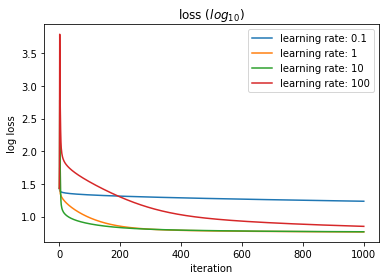

In [42]:
for i in range(loss_history.shape[0]):
    plt.plot(
        np.arange(loss_history.shape[1])+1,
        np.log10(loss_history[i,:]),
        label = 'learning rate: ' + str(learning_rate_list[i])
    )
plt.legend()
plt.title('loss $(log_{10})$')
plt.xlabel('iteration')
plt.ylabel('log loss')

### You will find that the best learning rate $\eta$ should be between 1 and 10
### Let's try to tune the learning rate

In [44]:
learning_rate_list = np.arange(1,11,1)
loss_history = []
dim = 18 * 9 + 1
iter_time = 1000
eps = 0.0000000001
for lr in learning_rate_list:
    print("Use learning rate:", lr)
    history = []
    w = np.zeros([dim, 1])
    temp_x = np.concatenate((np.ones([12 * 471, 1]), x), axis = 1).astype(float)
    learning_rate = lr
    adagrad = np.zeros([dim, 1])
    for t in range(iter_time):
        loss = np.sqrt(np.sum(np.power(np.dot(temp_x, w) - y, 2))/471/12)#rmse
        history.append(loss)
        if(t%100==0):
            print(str(t) + ":" + str(loss))
        gradient = 2 * np.dot(temp_x.transpose(), np.dot(temp_x, w) - y) #dim*1
        adagrad += gradient ** 2
        w = w - learning_rate * gradient / np.sqrt(adagrad + eps)
    loss_history.append(history)
loss_history = np.array(loss_history)

Use learning rate: 1
0:27.071214829194115
100:9.588690799485795
200:7.121841139361657
300:6.406107425474747
400:6.159380507523051
500:6.04409754514142
600:5.9736923475121815
700:5.923744683044117
800:5.885665583627625
900:5.855509409810967
Use learning rate: 2
0:27.071214829194115
100:7.036024096840861
200:6.4832554177999935
300:6.252630186180071
400:6.118935670779611
500:6.031127888033843
600:5.968813383252803
700:5.9222125435530195
800:5.886025131119693
900:5.857118593241929
Use learning rate: 3
0:27.071214829194115
100:7.0426766797771805
200:6.509563474857687
300:6.268547066717954
400:6.130698670738399
500:6.040870084026885
600:5.977313995435614
700:5.9298126695932964
800:5.892910109473008
900:5.863407898183062
Use learning rate: 4
0:27.071214829194115
100:7.109307887166671
200:6.538791725318005
300:6.284629209204646
400:6.14165996987294
500:6.049393307024212
600:5.9843871134134385
700:5.935873197013002
800:5.8981982072658345
900:5.868079214685191
Use learning rate: 5
0:27.071214829

Text(0, 0.5, 'log loss')

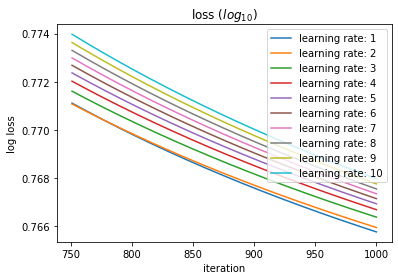

In [48]:
for i in range(loss_history.shape[0]):
    plt.plot(
        (np.arange(loss_history.shape[1])+1)[750:],
        (np.log10(loss_history[i,:]))[750:],
        label = 'learning rate: ' + str(learning_rate_list[i])
    )
plt.legend()
plt.title('loss $(log_{10})$')
plt.xlabel('iteration')
plt.ylabel('log loss')

### 0.5 to 1.5

In [49]:
learning_rate_list = np.arange(0.5,1.6,0.1)
loss_history = []
dim = 18 * 9 + 1
iter_time = 1000
eps = 0.0000000001
for lr in learning_rate_list:
    print("Use learning rate:", lr)
    history = []
    w = np.zeros([dim, 1])
    temp_x = np.concatenate((np.ones([12 * 471, 1]), x), axis = 1).astype(float)
    learning_rate = lr
    adagrad = np.zeros([dim, 1])
    for t in range(iter_time):
        loss = np.sqrt(np.sum(np.power(np.dot(temp_x, w) - y, 2))/471/12)#rmse
        history.append(loss)
        if(t%100==0):
            print(str(t) + ":" + str(loss))
        gradient = 2 * np.dot(temp_x.transpose(), np.dot(temp_x, w) - y) #dim*1
        adagrad += gradient ** 2
        w = w - learning_rate * gradient / np.sqrt(adagrad + eps)
    loss_history.append(history)
loss_history = np.array(loss_history)

Use learning rate: 0.5
0:27.071214829194115
100:14.807288231983968
200:11.86989584661343
300:10.028932567476115
400:8.772024559602109
500:7.890271035057451
600:7.267163584793615
700:6.82685213687793
800:6.5162416609690155
900:6.297237521481214
Use learning rate: 0.6
0:27.071214829194115
100:13.502261432680061
200:10.38542063701238
300:8.611903544912371
400:7.536618806769701
500:6.87797848562919
600:6.474543026089745
700:6.226445627224299
800:6.0718707475355105
900:5.973294367929093
Use learning rate: 0.7
0:27.071214829194115
100:12.32595615614676
200:9.1810425088873
300:7.609973201965947
400:6.794503522720827
500:6.368413012655577
600:6.140926186985487
700:6.013677550203403
800:5.937437021092896
900:5.887936760458523
Use learning rate: 0.7999999999999999
0:27.071214829194115
100:11.28051177054237
200:8.252408831199258
300:6.968179102870202
400:6.407916092353206
500:6.152200293360295
600:6.02351231604587
700:5.949569198849436
800:5.901149636710751
900:5.866074863213267
Use learning rate

Text(0, 0.5, 'log loss')

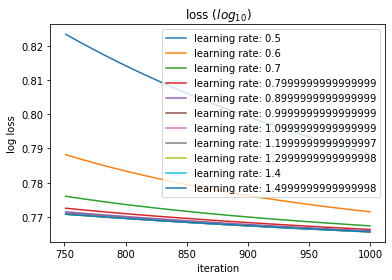

In [51]:
for i in range(loss_history.shape[0]):
    plt.plot(
        (np.arange(loss_history.shape[1])+1)[750:],
        (np.log10(loss_history[i,:]))[750:],
        label = 'learning rate: ' + str(learning_rate_list[i])
    )
plt.legend()
plt.title('loss $(log_{10})$')
plt.xlabel('iteration')
plt.ylabel('log loss')

In [54]:
loss_history[:,-1], loss_history[-4,-1], learning_rate_list[-4]

(array([6.14380064, 5.90887702, 5.85347739, 5.83916622, 5.83381752,
        5.83126879, 5.83006917, 5.82964319, 5.82968089, 5.82999943,
        5.8304871 ]), 5.829643190320824, 1.1999999999999997)

### 1.15 to 1.25

In [59]:
learning_rate_list = np.arange(1.15,1.26,0.01)
loss_history = []
dim = 18 * 9 + 1
iter_time = 2000
eps = 0.0000000001
for lr in learning_rate_list:
    print("Use learning rate:", lr)
    history = []
    w = np.zeros([dim, 1])
    temp_x = np.concatenate((np.ones([12 * 471, 1]), x), axis = 1).astype(float)
    learning_rate = lr
    adagrad = np.zeros([dim, 1])
    for t in range(iter_time):
        loss = np.sqrt(np.sum(np.power(np.dot(temp_x, w) - y, 2))/471/12)#rmse
        history.append(loss)
        if(t%100==0):
            print(str(t) + ":" + str(loss))
        gradient = 2 * np.dot(temp_x.transpose(), np.dot(temp_x, w) - y) #dim*1
        adagrad += gradient ** 2
        w = w - learning_rate * gradient / np.sqrt(adagrad + eps)
    loss_history.append(history)
loss_history = np.array(loss_history)

Use learning rate: 1.15
0:27.071214829194115
100:8.662231265872315
200:6.7356768574792
300:6.290320827017134
400:6.125368592028887
500:6.0318254575696395
600:5.967549071332357
700:5.919820467619679
800:5.882882451958326
900:5.853477717489405
1000:5.829565999979851
1100:5.809795382333025
1200:5.793233074236109
1300:5.779213455668201
1400:5.767247337674989
1500:5.756965669408109
1600:5.748083533949579
1700:5.740376493479727
1800:5.733664654196458
1900:5.727801671685616
Use learning rate: 1.16
0:27.071214829194115
100:8.610345039655956
200:6.719253789745646
300:6.286569451040378
400:6.124422518216448
500:6.031460473811182
600:5.967339503532385
700:5.919680498131578
800:5.882787287911065
900:5.853415107894187
1000:5.829527723773618
1100:5.809775382147138
1200:5.793226770040147
1300:5.779217348641065
1400:5.76725873827223
1500:5.756982501401754
1600:5.748104190531614
1700:5.7403997301891065
1800:5.733689508290561
1900:5.7278274007536325
Use learning rate: 1.17
0:27.071214829194115
100:8.559

Text(0, 0.5, 'log loss')

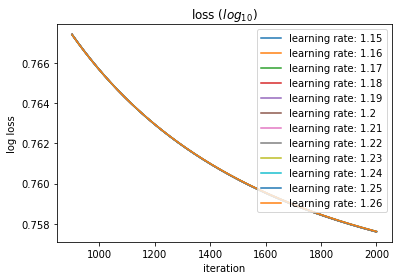

In [60]:
for i in range(loss_history.shape[0]):
    plt.plot(
        (np.arange(loss_history.shape[1])+1)[900:],
        (np.log10(loss_history[i,:]))[900:],
        label = 'learning rate: ' + str(learning_rate_list[i])
    )
plt.legend()
plt.title('loss $(log_{10})$')
plt.xlabel('iteration')
plt.ylabel('log loss')

In [61]:
loss_history[:,-1]
# , loss_history[-4,-1], learning_rate_list[-4]

array([5.72271507, 5.72274111, 5.72276832, 5.72279663, 5.72282597,
       5.72285628, 5.72288749, 5.72291955, 5.72295241, 5.722986  ,
       5.72302029, 5.72305522])

### Training

In [62]:
dim = 18 * 9 + 1
w = np.zeros([dim, 1])
temp_x = np.concatenate((np.ones([12 * 471, 1]), x), axis = 1).astype(float)
learning_rate = 1.15
iter_time = 20000
adagrad = np.zeros([dim, 1])
eps = 0.0000000001
for t in range(iter_time):
    loss = np.sqrt(np.sum(np.power(np.dot(temp_x, w) - y, 2))/471/12)#rmse
    if(t%100==0):
        print(str(t) + ":" + str(loss))
    gradient = 2 * np.dot(temp_x.transpose(), np.dot(temp_x, w) - y) #dim*1
    adagrad += gradient ** 2
    w = w - learning_rate * gradient / np.sqrt(adagrad + eps)
np.save('./../model/weight2.npy', w)
w

0:27.071214829194115
100:8.662231265872315
200:6.7356768574792
300:6.290320827017134
400:6.125368592028887
500:6.0318254575696395
600:5.967549071332357
700:5.919820467619679
800:5.882882451958326
900:5.853477717489405
1000:5.829565999979851
1100:5.809795382333025
1200:5.793233074236109
1300:5.779213455668201
1400:5.767247337674989
1500:5.756965669408109
1600:5.748083533949579
1700:5.740376493479727
1800:5.733664654196458
1900:5.727801671685616
2000:5.722666988203501
2100:5.718160229497122
2200:5.7141970749295385
2300:5.710706153472002
2400:5.707626668367492
2500:5.70490654938914
2600:5.702500994137083
2700:5.700371301165134
2800:5.698483925534528
2900:5.6968097064049275
3000:5.695323229488495
3100:5.69400229652704
3200:5.692827480647548
3300:5.691781751325142
3400:5.6908501562800415
3500:5.69001955032599
3600:5.6892783632251405
3700:5.688616400165403
3800:5.68802466968506
3900:5.687495234815307
4000:5.687021083958368
4100:5.686596018614273
4200:5.686214555547901
4300:5.685871841375524


array([[ 2.13740269e+01],
       [ 3.85270837e-01],
       [-8.72186873e-01],
       [ 1.14632855e+00],
       [-1.66710021e+00],
       [-4.63824869e-02],
       [ 1.01548624e+00],
       [-3.81387133e-01],
       [-1.69668776e+00],
       [ 2.02608662e+00],
       [-3.18949608e-01],
       [ 1.44856074e-01],
       [ 8.21222554e-02],
       [ 9.33269902e-02],
       [-1.50940499e-02],
       [-2.43863995e-02],
       [-1.82001434e-01],
       [ 1.61743152e-01],
       [ 5.15517338e-01],
       [ 5.26652730e-02],
       [-2.62528006e-02],
       [ 6.53431451e-02],
       [-1.60511994e-01],
       [ 1.52182832e-01],
       [-2.08594701e-02],
       [-1.64841667e-01],
       [ 7.84341763e-02],
       [ 4.03974744e-01],
       [-3.11501407e-01],
       [ 3.82403746e-01],
       [-2.58370273e-01],
       [ 2.91603413e-01],
       [ 3.24091277e-01],
       [-5.17323724e-01],
       [ 8.79174256e-02],
       [ 1.78056758e-01],
       [ 8.05330206e-02],
       [ 8.94204009e-02],
       [ 6.7

### Predict

In [63]:
w = np.load('./../model/weight2.npy')
ans_y = np.dot(test_x, w)
ans_y

array([[  6.56388488],
       [ 18.20843366],
       [ 24.11192758],
       [  7.69839877],
       [ 27.05324686],
       [ 22.20267283],
       [ 23.80252669],
       [ 30.56460209],
       [ 16.80441255],
       [ 59.62842562],
       [ 11.72358411],
       [  9.30211462],
       [ 63.25184178],
       [ 53.25524339],
       [ 22.14179826],
       [ 12.22625616],
       [ 32.39871202],
       [ 66.72583488],
       [ -0.52124227],
       [ 17.12871201],
       [ 41.82090539],
       [ 72.17890451],
       [  9.27560133],
       [ 17.88976945],
       [ 14.73114252],
       [ 37.95200081],
       [ 14.66884511],
       [ 67.24468537],
       [  7.2130679 ],
       [ 55.45732561],
       [ 24.4955458 ],
       [  8.55247856],
       [  2.53082584],
       [ 18.66541838],
       [ 27.69327021],
       [ 37.23329652],
       [ 43.26696375],
       [ 29.76168662],
       [ 42.09561351],
       [ 35.23026276],
       [  7.65087218],
       [ 41.19154706],
       [ 30.52685719],
       [ 51

### Save

In [64]:
import csv
with open('./../results/submit2.csv', mode='w', newline='') as submit_file:
    csv_writer = csv.writer(submit_file)
    header = ['id', 'value']
    print(header)
    csv_writer.writerow(header)
    for i in range(240):
        row = ['id_' + str(i), ans_y[i][0]]
        csv_writer.writerow(row)
        print(row)

['id', 'value']
['id_0', 6.563884875865352]
['id_1', 18.208433660461072]
['id_2', 24.111927576344744]
['id_3', 7.698398767567703]
['id_4', 27.053246856732887]
['id_5', 22.202672829165284]
['id_6', 23.80252668527666]
['id_7', 30.56460209156103]
['id_8', 16.804412550427426]
['id_9', 59.628425617105734]
['id_10', 11.723584112327478]
['id_11', 9.302114618382069]
['id_12', 63.251841779540584]
['id_13', 53.255243386252076]
['id_14', 22.141798260358073]
['id_15', 12.226256158838863]
['id_16', 32.39871202247019]
['id_17', 66.72583487790692]
['id_18', -0.5212422694138823]
['id_19', 17.128712011653136]
['id_20', 41.82090539431121]
['id_21', 72.17890450890741]
['id_22', 9.275601325356952]
['id_23', 17.889769451405954]
['id_24', 14.731142522692256]
['id_25', 37.95200081400479]
['id_26', 14.66884510917994]
['id_27', 67.24468536758329]
['id_28', 7.2130678987728345]
['id_29', 55.45732561121871]
['id_30', 24.495545801201395]
['id_31', 8.552478563161248]
['id_32', 2.530825842571982]
['id_33', 18.665418